# Grupowanie Hierarchiczne - Przykład Uczenia Nienadzorowanego

## Spis treści:
1. [Wprowadzenie](#Wprowadzenie)
2. [Czym jest grupowanie hierarchiczne](#Czym-jest-grupowanie-hierarchiczne)
3. [Kroki algorytmu grupowania hierarchicznego](#Kroki-algorytmu-grupowania-hierarchicznego)
4. [Przykład implementacji w Pythonie](#Przykład-implementacji-w-Pythonie)
    - [Dane wejściowe](#Dane-wejściowe)
    - [Macierz odległości](#Macierz-odległości)
    - [Wizualizacja dendrogramu](#Wizualizacja-dendrogramu)





## Wprowadzenie

Uczenie nienadzorowane to rodzaj uczenia maszynowego, w którym dane wejściowe nie posiadają etykiet ani wyników docelowych. Model ma za zadanie znaleźć ukryte struktury lub wzorce w danych.


![Schemat uczenia nienadzorowanego](schemat_uczenie_nienadzorowane.png)

W uczeniu nienadzorowanym mamy zbiór danych $ \{x_1, ..., x_n\} $, ale nie mamy etykiet $ y_i $. Celem jest znalezienie struktury lub wzorców w danych. Algorytmy tego typu najczęściej starają się grupować dane (klasteryzacja) lub redukować ich wymiar (np. PCA - Analiza Składowych Głównych).



W klasteryzacji, takiej jak algorytm $k$-średnich, staramy się znaleźć $k$ centrów klastrów $\mu_1, ..., \mu_k$, które minimalizują sumę odległości między punktami danych a najbliższymi centrami klastrów:

$$
\min_{\mu} \sum_{i=1}^n \big\| x_i - \mu_{c(i)} \big\|^2,
$$

gdzie:
- $x_i$ to punkt danych,
- $\mu_{c(i)}$ to centrum najbliższego klastra dla punktu $x_i$,
- $\|\cdot\|$ oznacza normę euklidesową (odległość euklidesową).



Przykładami zastosowań uczenia nienadzorowanego są:
- **Klasteryzacja** (np. grupowanie klientów),
- **Redukcja wymiarów** (np. PCA - Principal Component Analysis),
- **Odkrywanie wzorców w danych** (np. analiza zachowań użytkowników w sklepie internetowym),
- **Segmentacja obrazów** (np. rozdzielanie różnych elementów obrazu, takich jak niebo, drzewa, budynki),
- **Detekcja anomalii** (np. wykrywanie nieprawidłowych transakcji finansowych, wykrywanie błędów w czujnikach),
- **Analiza koszykowa** (np. algorytm "Market Basket Analysis", który wykrywa, jakie produkty są często kupowane razem),
- **Kompresja danych** (np. redukcja wymiarów w danych obrazowych, aby zmniejszyć ich rozmiar przy zachowaniu kluczowych informacji),
- **Modelowanie tematów** (np. analiza tematów w dużej kolekcji dokumentów tekstowych przy użyciu LDA - Latent Dirichlet Allocation),
- **Grupowanie genów** w analizie genomowej (np. grupowanie genów o podobnym wzorze ekspresji),
- **Tworzenie rekomendacji** (np. rekomendacje produktów lub treści w oparciu o podobieństwa użytkowników i ich preferencji).




## Czym jest grupowanie hierarchiczne

Grupowanie hierarchiczne to technika klasteryzacji w uczeniu nienadzorowanym, która grupuje dane w hierarchiczną strukturę. Wynikiem tego procesu jest dendrogram, który przedstawia kolejność łączenia klastrów.





##  Kroki algorytmu grupowania hierarchicznego

### **Etapy działania algorytmu:**
1. **Inicjalizacja**:
    - Każdy punkt zaczyna jako oddzielny klaster.
2. **Obliczenie macierzy odległości**:
    - Obliczamy odległości między wszystkimi parami punktów, np. za pomocą odległości euklidesowej:
      $$
      d((x_1, y_1), (x_2, y_2)) = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}.
      $$
3. **Łączenie klastrów**:
    - Znajdujemy dwa najbliższe klastry i łączymy je.
4. **Aktualizacja macierzy odległości**:
    - Przeliczamy odległości między nowym klastrem a pozostałymi.
5. **Powtarzamy kroki, aż wszystkie punkty znajdą się w jednym klastrze**.

### **Typy kryteriów łączenia:**
- **Single linkage**: Minimalna odległość między punktami w klastrach.
- **Complete linkage**: Maksymalna odległość między punktami w klastrach.
- **Average linkage**: Średnia odległość między punktami w klastrach.




##  Przykład implementacji w Pythonie


In [1]:
# Importowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform

# Dane wejściowe
points = np.array([[2, 3, 6], [3, 5, 5], [5, 7, 7], [6, 8, 8]])
df = pd.DataFrame(points, columns=["x", "y", "z"])
display(df)


,x,y,z
0,2,3,6
1,3,5,5
2,5,7,7
3,6,8,8



Powyższy otrzymaliśmy pewne punkty, które możemy zwizulizować w przestrzeni dwuwymiarowej $R^2$. Na tym etapie każdy punkt zaczyna jako oddzielny klaster.


Na wykresie możemy zauważyć rozmieszczenie punktów w układzie współrzędnych, co pozwala zrozumieć ich rozkład i relacje. Taka wizualizacja jest często używana jako pierwszy krok w analizie danych, np. przed zastosowaniem algorytmu grupowania lub klasteryzacji.

## 📊 **Wyjaśnienie argumentów plt.scatter()**

Przeanalizujmy funkcję:
```python
plt.scatter(points[:, 0], points[:, 1], color='#6ca935', label='Punkty danych', s=300)
```

### **🎯 Argumenty pozycyjne (współrzędne):**

#### **1. `points[:, 0]` - współrzędne X**
- **`points`** - tablica numpy z punktami `[[2,3,6], [3,5,5], [5,7,7], [6,8,8]]`
- **`[:, 0]`** - wybiera **pierwszą kolumnę** (indeks 0) ze wszystkich wierszy
- **Rezultat:** `[2, 3, 5, 6]` - współrzędne X punktów A, B, C, D

#### **2. `points[:, 1]` - współrzędne Y**
- **`[:, 1]`** - wybiera **drugą kolumnę** (indeks 1) ze wszystkich wierszy  
- **Rezultat:** `[3, 5, 7, 8]` - współrzędne Y punktów A, B, C, D

---

### **🎨 Argumenty nazwane (formatowanie):**

#### **3. `color='#6ca935'` - kolor punktów**
- **Format:** kod hex koloru
- **`#6ca935`** = zielony kolor (RGB: 108, 169, 53)
- **Alternatywnie:** `'green'`, `'red'`, `'blue'` lub `(0.5, 0.8, 0.2)`

#### **4. `label='Punkty danych'` - etykieta legendy**
- **Tekst** wyświetlany w legendzie wykresu
- **Używane z:** `plt.legend()` do pokazania legendy
- **Pozwala** identyfikować różne serie danych

#### **5. `s=300` - rozmiar punktów**  
- **`s`** = size (rozmiar w punktach²)
- **300** = stosunkowo duże punkty
- **Domyślnie:** `s=20`
- **Może być:** liczba (wszystkie punkty) lub lista (różne rozmiary)

🔢 DANE WEJŚCIOWE:
points = 
[[2 3 6]
 [3 5 5]
 [5 7 7]
 [6 8 8]]

Kształt tablicy: (4, 3) (4 punkty × 3 współrzędne)

📍 WYODRĘBNIENIE WSPÓŁRZĘDNYCH:
points[:, 0] (X) = [2 3 5 6]
points[:, 1] (Y) = [3 5 7 8]

🎨 ZNACZENIE ARGUMENTÓW:
• x = points[:, 0] → współrzędne X punktów
• y = points[:, 1] → współrzędne Y punktów
• color='#6ca935' → zielony kolor (hex)
• label='Punkty danych' → nazwa w legendzie
• s=300 → rozmiar punktów (300 punktów²)


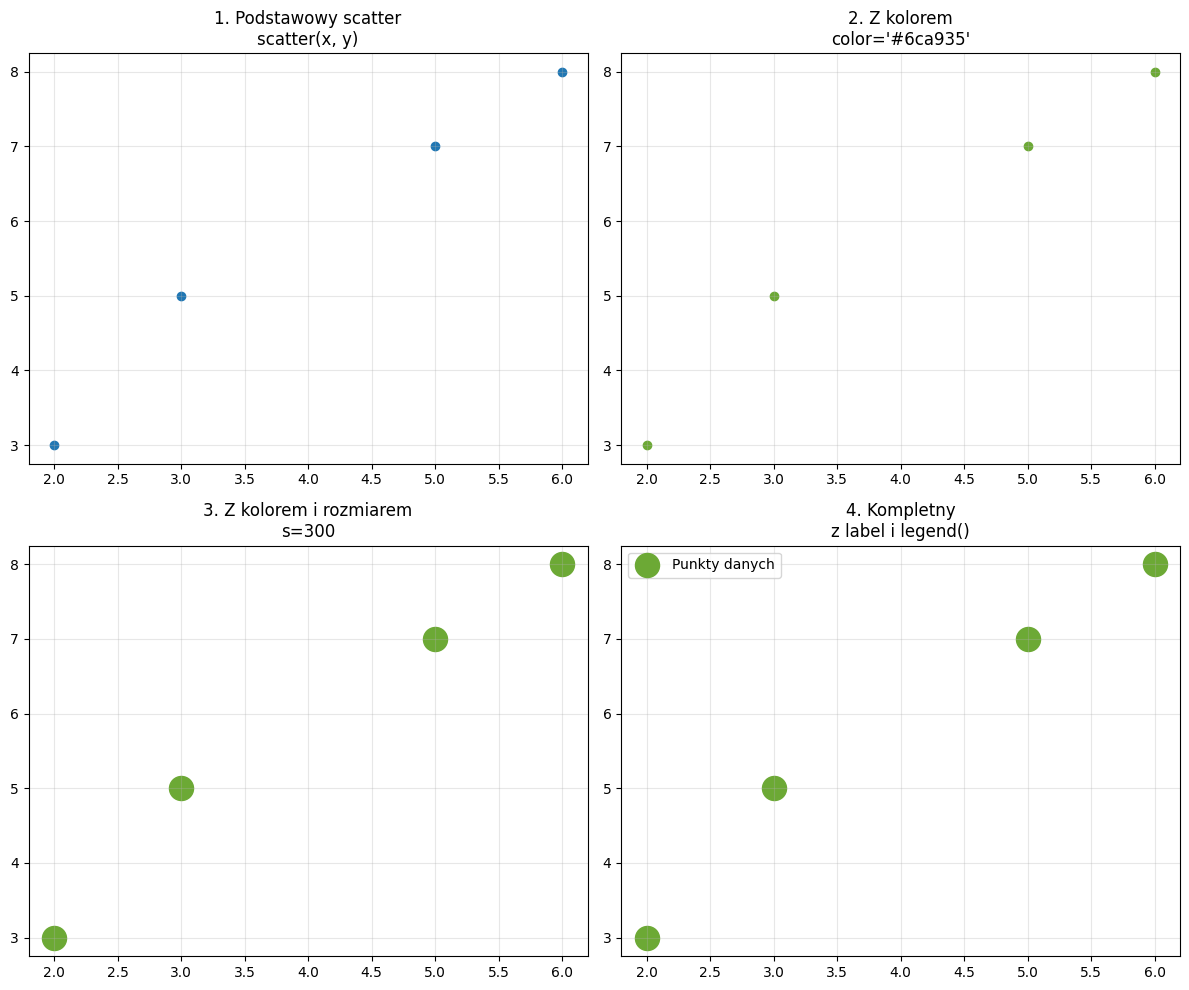

In [1]:
# 🔍 DEMONSTRACJA KAŻDEGO ARGUMENTU

import numpy as np
import matplotlib.pyplot as plt

# Nasze dane
points = np.array([[2, 3, 6], [3, 5, 5], [5, 7, 7], [6, 8, 8]])

print("🔢 DANE WEJŚCIOWE:")
print(f"points = \n{points}")
print(f"\nKształt tablicy: {points.shape} (4 punkty × 3 współrzędne)")

print("\n📍 WYODRĘBNIENIE WSPÓŁRZĘDNYCH:")
x_coords = points[:, 0]  # Pierwsza kolumna
y_coords = points[:, 1]  # Druga kolumna
print(f"points[:, 0] (X) = {x_coords}")
print(f"points[:, 1] (Y) = {y_coords}")

print("\n🎨 ZNACZENIE ARGUMENTÓW:")
print("• x = points[:, 0] → współrzędne X punktów")
print("• y = points[:, 1] → współrzędne Y punktów") 
print("• color='#6ca935' → zielony kolor (hex)")
print("• label='Punkty danych' → nazwa w legendzie")
print("• s=300 → rozmiar punktów (300 punktów²)")

# Tworzenie wykresu krok po kroku
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Wykres 1: Tylko podstawowe współrzędne
axes[0,0].scatter(points[:, 0], points[:, 1])
axes[0,0].set_title('1. Podstawowy scatter\nscatter(x, y)')
axes[0,0].grid(True, alpha=0.3)

# Wykres 2: Z kolorem
axes[0,1].scatter(points[:, 0], points[:, 1], color='#6ca935')
axes[0,1].set_title("2. Z kolorem\ncolor='#6ca935'")
axes[0,1].grid(True, alpha=0.3)

# Wykres 3: Z kolorem i rozmiarem
axes[1,0].scatter(points[:, 0], points[:, 1], color='#6ca935', s=300)
axes[1,0].set_title('3. Z kolorem i rozmiarem\ns=300')
axes[1,0].grid(True, alpha=0.3)

# Wykres 4: Kompletny (z etykietą)
axes[1,1].scatter(points[:, 0], points[:, 1], color='#6ca935', label='Punkty danych', s=300)
axes[1,1].legend()  # Pokaż legendę
axes[1,1].set_title("4. Kompletny\nz label i legend()")
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🎨 INNE PRZYDATNE ARGUMENTY plt.scatter():


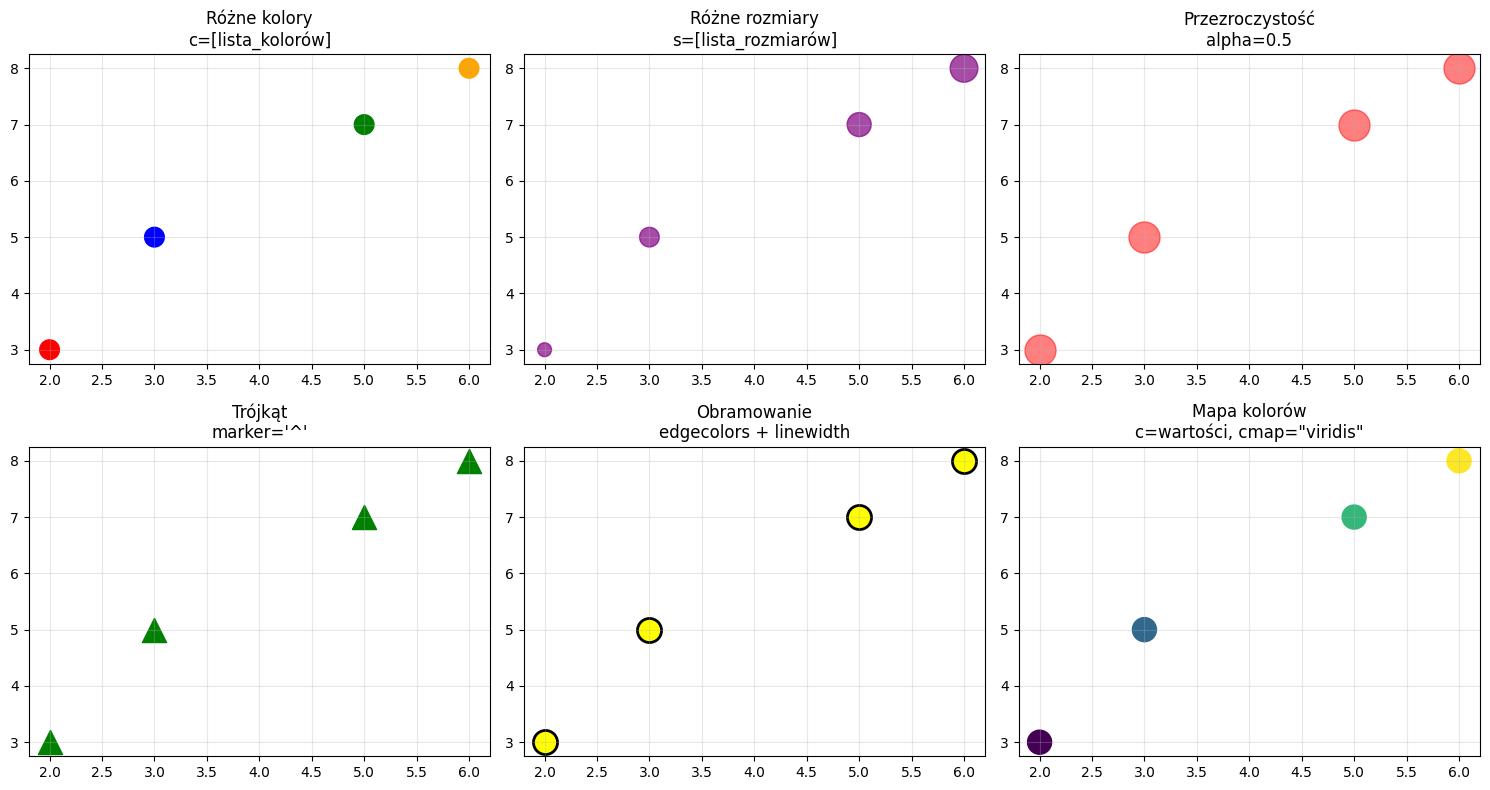


📋 PODSUMOWANIE ARGUMENTÓW:
• x, y → współrzędne punktów
• color/c → kolor(y) punktów
• s → rozmiar punktów
• alpha → przezroczystość (0-1)
• marker → kształt (o, ^, s, *, +)
• label → etykieta do legendy
• edgecolors → kolor obramowania
• linewidth → grubość obramowania
• cmap → mapa kolorów dla wartości numerycznych


In [2]:
# 🎯 DODATKOWE OPCJE SCATTER PLOT

print("🎨 INNE PRZYDATNE ARGUMENTY plt.scatter():")

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Różne kolory dla każdego punktu
colors = ['red', 'blue', 'green', 'orange']
axes[0,0].scatter(points[:, 0], points[:, 1], c=colors, s=200)
axes[0,0].set_title('Różne kolory\nc=[lista_kolorów]')
axes[0,0].grid(True, alpha=0.3)

# Różne rozmiary dla każdego punktu  
sizes = [100, 200, 300, 400]
axes[0,1].scatter(points[:, 0], points[:, 1], s=sizes, color='purple', alpha=0.7)
axes[0,1].set_title('Różne rozmiary\ns=[lista_rozmiarów]')
axes[0,1].grid(True, alpha=0.3)

# Przezroczystość (alpha)
axes[0,2].scatter(points[:, 0], points[:, 1], color='red', s=500, alpha=0.5)
axes[0,2].set_title('Przezroczystość\nalpha=0.5')
axes[0,2].grid(True, alpha=0.3)

# Różne kształty (marker)
axes[1,0].scatter(points[:, 0], points[:, 1], marker='^', s=300, color='green')
axes[1,0].set_title("Trójkąt\nmarker='^'")
axes[1,0].grid(True, alpha=0.3)

# Obramowanie punktów
axes[1,1].scatter(points[:, 0], points[:, 1], s=300, 
                 facecolors='yellow', edgecolors='black', linewidth=2)
axes[1,1].set_title('Obramowanie\nedgecolors + linewidth')
axes[1,1].grid(True, alpha=0.3)

# Mapa kolorów (colormap)
values = [1, 2, 3, 4]  # Wartości do mapowania kolorów
scatter = axes[1,2].scatter(points[:, 0], points[:, 1], c=values, s=300, cmap='viridis')
axes[1,2].set_title('Mapa kolorów\nc=wartości, cmap="viridis"')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📋 PODSUMOWANIE ARGUMENTÓW:")
print("• x, y → współrzędne punktów")
print("• color/c → kolor(y) punktów") 
print("• s → rozmiar punktów")
print("• alpha → przezroczystość (0-1)")
print("• marker → kształt (o, ^, s, *, +)")
print("• label → etykieta do legendy")
print("• edgecolors → kolor obramowania")
print("• linewidth → grubość obramowania") 
print("• cmap → mapa kolorów dla wartości numerycznych")

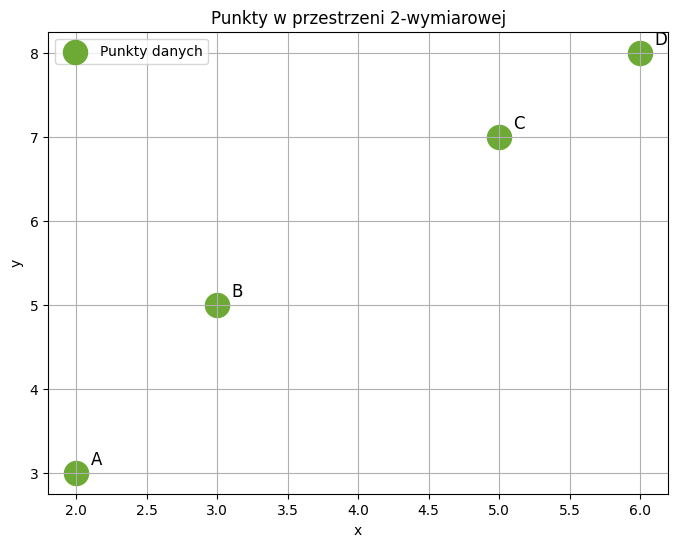

In [2]:
# Wizualizacja punktów w przestrzeni R^2 w Twoich kolorach
plt.figure(figsize=(8, 6))

plt.scatter(points[:, 0], points[:, 1], color='#6ca935', label='Punkty danych', s=300)
for i, label in enumerate(['A', 'B', 'C', 'D']):
    plt.text(points[i, 0] + 0.1, points[i, 1] + 0.1, label, fontsize=12, color='#000000')


plt.xlabel('x')
plt.ylabel('y')
plt.title('Punkty w przestrzeni 2-wymiarowej')
plt.legend()
plt.grid()
plt.show()


Obliczamy odległości między wszystkimi parami punktów, np. za pomocą odległości euklidesowej:

In [3]:

distance_matrix = pdist(points, metric='euclidean')  # Odległość euklidesowa
distance_square = squareform(distance_matrix)  # Konwersja na macierz kwadratową
display(pd.DataFrame(distance_square, columns=["A", "B", "C", "D"], index=["A", "B", "C", "D"]))


,A,B,C,D
A,0.000000,2.449490,5.099020,6.708204
B,2.449490,0.000000,3.464102,5.196152
C,5.099020,3.464102,0.000000,1.732051
D,6.708204,5.196152,1.732051,0.000000


Grupowanie hierarchiczne (metoda single linkage)

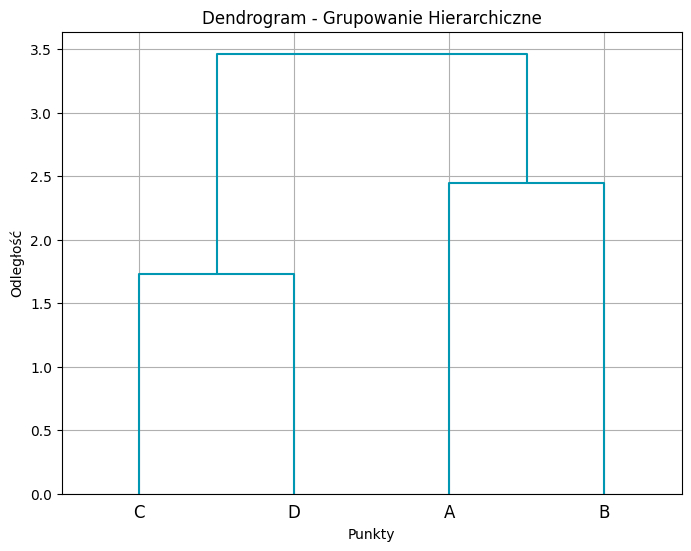

In [4]:

linkage_matrix = linkage(points, method='single')

# Tworzenie dendrogramu
plt.figure(figsize=(8, 6))
dendrogram(
    linkage_matrix,
    labels=["A", "B", "C", "D"],
    color_threshold=1.5,
    above_threshold_color='#0097b2',
    link_color_func=lambda x: '#0cc0df' if x < 1.5 else '#0097b2' )
plt.title("Dendrogram - Grupowanie Hierarchiczne")
plt.xlabel("Punkty")
plt.ylabel("Odległość")
plt.grid()
plt.show()


In [5]:

# Klasyfikacja na podstawie dendrogramu
print("\n### Przypisanie punktów do klastrów ###")
clusters = fcluster(linkage_matrix, t=2, criterion='maxclust')  # Ustal t=2 klastry
df["Klaster"] = clusters
display(df)



### Przypisanie punktów do klastrów ###


,x,y,z,Klaster
0,2,3,6,2
1,3,5,5,2
2,5,7,7,1
3,6,8,8,1


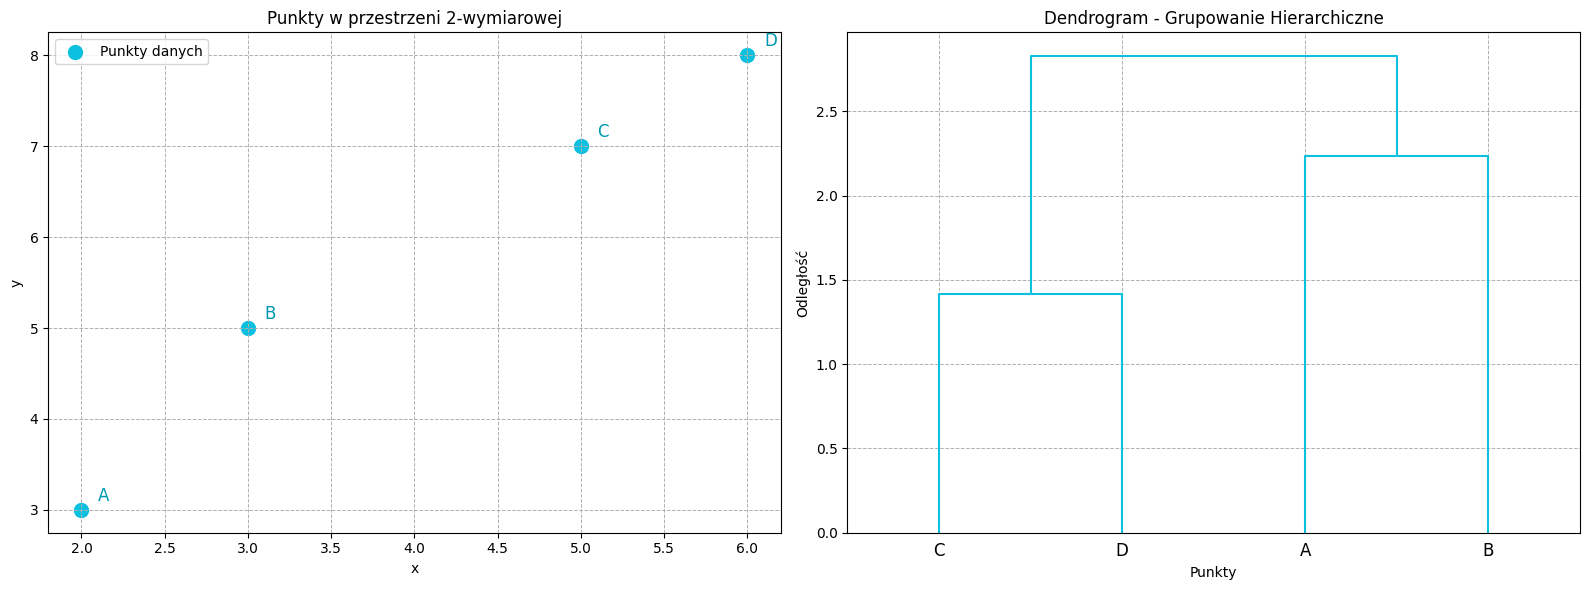

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))


axs[0].scatter(points[:, 0], points[:, 1], color='#0cc0df', label='Punkty danych', s=100)
for i, label in enumerate(['A', 'B', 'C', 'D']):
    axs[0].text(points[i, 0] + 0.1, points[i, 1] + 0.1, label, fontsize=12, color='#0097b2')

axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Punkty w przestrzeni 2-wymiarowej')
axs[0].grid(linestyle='--', linewidth=0.7)
axs[0].legend()

# Wykres 2: Dendrogram grupowania hierarchicznego
dendrogram(linkage_matrix, labels=["A", "B", "C", "D"], color_threshold=2.0,
           above_threshold_color='#0097b2', link_color_func=lambda x: '#0cc0df', ax=axs[1])

axs[1].set_title("Dendrogram - Grupowanie Hierarchiczne")
axs[1].set_xlabel("Punkty")
axs[1].set_ylabel("Odległość")
axs[1].grid(linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

## Przykład numeryczny krop po kroku z wykładu ale z wykorzystaniem metody łaczenia: **Metoda centroidowa (średnia)**


In [ ]:

import numpy as np
import pandas as pd


points = np.array([[2, 3], [3, 5], [5, 7], [6, 8]])
labels = ["A", "B", "C", "D"]


def calculate_distance_matrix(points, labels):
    n = len(points)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                distance_matrix[i, j] = np.sqrt((points[i, 0] - points[j, 0])**2 + (points[i, 1] - points[j, 1])**2)
    return pd.DataFrame(distance_matrix, columns=labels, index=labels)


In [ ]:

# Pierwotna macierz odległości
print("Macierz początkowa:")
distance_matrix = calculate_distance_matrix(points, labels)
display(distance_matrix)


Macierz początkowa:


,A,B,C,D
A,0.000000,2.236068,5.000000,6.403124
B,2.236068,0.000000,2.828427,4.242641
C,5.000000,2.828427,0.000000,1.414214
D,6.403124,4.242641,1.414214,0.000000


In [ ]:

# Iteracja 1: Połączenie C i D
print("\nMacierz po 1 iteracji (połączenie C i D):")
points_iter1 = np.array([[2, 3], [3, 5], [5, 7.5]])  # CD reprezentowane jako centroid
labels_iter1 = ["A", "B", "CD"]
distance_matrix_iter1 = calculate_distance_matrix(points_iter1, labels_iter1)
display(distance_matrix_iter1)



Macierz po 1 iteracji (połączenie C i D):


,A,B,CD
A,0.000000,2.236068,5.408327
B,2.236068,0.000000,3.201562
CD,5.408327,3.201562,0.000000


In [ ]:

# Iteracja 2: Połączenie A i B
print("\nMacierz po 2 iteracji (połączenie A i B):")
points_iter2 = np.array([[2.5, 4], [5, 7.5]])  # AB reprezentowane jako centroid
labels_iter2 = ["AB", "CD"]
distance_matrix_iter2 = calculate_distance_matrix(points_iter2, labels_iter2)
display(distance_matrix_iter2)



Macierz po 2 iteracji (połączenie A i B):


,AB,CD
AB,0.000000,4.301163
CD,4.301163,0.000000
